# Time Series Analysis

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import prophet
from prophet import Prophet
from prophet.plot import plot_plotly
from prophet.plot import plot_cross_validation_metric
from prophet.diagnostics import performance_metrics

### Reading Datasets:

In [ ]:
DailyConsumption = pd.read_csv('/content/DailyConsumption.csv')
DailyConsumption['Revenue Daily'] = pd.to_datetime(DailyConsumption['Revenue Daily'])
DailyConsumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3684 entries, 0 to 3683
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Revenue Daily      3684 non-null   datetime64[ns]
 1   Consumption (KWH)  3684 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.7 KB


In [ ]:
MonthlyConsumption = pd.read_csv('/content/monthly.csv')
MonthlyConsumption['Revenue Month'] = pd.to_datetime(MonthlyConsumption['Revenue Month'])
MonthlyConsumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Revenue Month      121 non-null    datetime64[ns]
 1   Consumption (KWH)  121 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.0 KB


In [ ]:
YearlyConsumption = pd.read_csv('/content/Yearly.csv')
YearlyConsumption['Revenue Yearly'] = pd.to_datetime(YearlyConsumption['Revenue Yearly'])
YearlyConsumption.info()
MonthlyConsumption.rename(columns={'Revenue Month':'ds','Consumption (KWH)':'y'},inplace=True)
YearlyConsumption.rename(columns={'Revenue Yearly':'ds','Consumption (KWH)':'y'},inplace=True)
DailyConsumption.rename(columns={'Revenue Daily':'ds','Consumption (KWH)':'y'},inplace=True)
DailyConsumption.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Revenue Yearly     10 non-null     datetime64[ns]
 1   Consumption (KWH)  10 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 288.0 bytes


,ds,y
0,2010-01-01,45446.03078
1,2010-01-02,45446.03078
2,2010-01-03,45446.03078
3,2010-01-04,45446.03078
4,2010-01-05,45446.03078
...,...,...
95,2010-04-06,36808.51446
96,2010-04-07,36808.51446
97,2010-04-08,36808.51446
98,2010-04-09,36808.51446


### Creating Monthly Model :

In [119]:
monthly_model = Prophet()
train_m = MonthlyConsumption.iloc[:len(MonthlyConsumption)-25]
test_m = MonthlyConsumption.iloc[len(MonthlyConsumption)-25:]
monthly_model.fit(train_m)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgybeuz16/ze95nluq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgybeuz16/j1sjym_3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53927', 'data', 'file=/tmp/tmpgybeuz16/ze95nluq.json', 'init=/tmp/tmpgybeuz16/j1sjym_3.json', 'output', 'file=/tmp/tmpgybeuz16/prophet_modeljvw3qnys/prophet_model-20221221231827.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:18:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:18:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


### Predictions for Monthly :

In [ ]:
future = monthly_model.make_future_dataframe(periods=1, freq='M')
future.tail()

,ds
92,2019-09-01
93,2019-10-01
94,2019-11-01
95,2019-12-01
96,2019-12-31


In [120]:
forecast = monthly_model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
100,2020-04-30,24110.025221,21411.109156,26799.472460
101,2020-05-31,29165.842512,26478.455049,31699.235662
102,2020-06-30,37057.746288,34658.198416,39623.448557
103,2020-07-31,38605.866223,36076.087110,41191.337390
104,2020-08-31,33734.951592,31249.116195,36331.424308


### Graphical Representation :

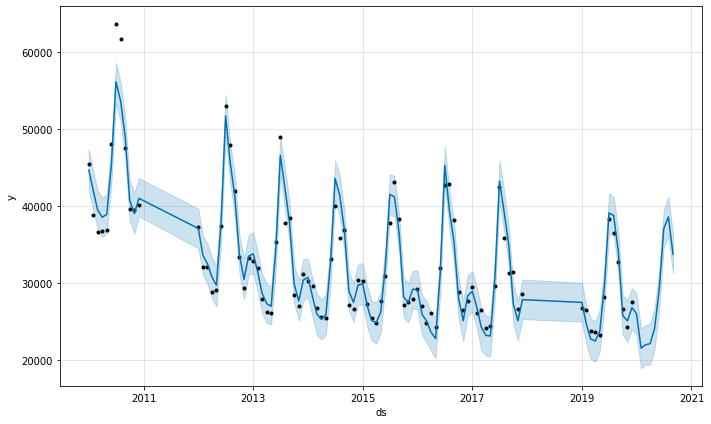

In [121]:
fig1 = monthly_model.plot(forecast)

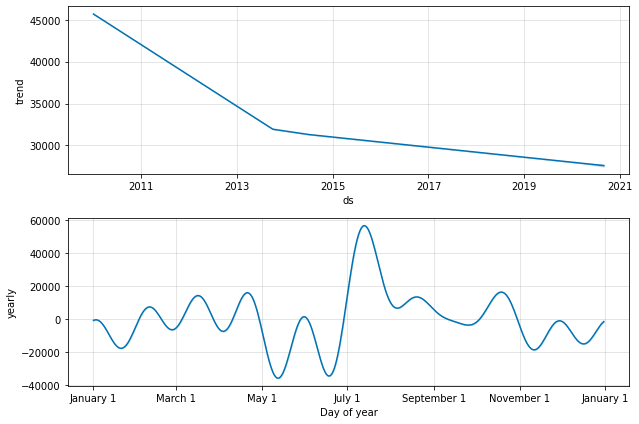

In [122]:
fig2 = monthly_model.plot_components(forecast)

### Predictions for 6 Months :

In [123]:
future_6_months = monthly_model.make_future_dataframe(periods=6, freq='M')
future_6_months.tail()

,ds
97,2020-01-31
98,2020-02-29
99,2020-03-31
100,2020-04-30
101,2020-05-31


In [124]:
forecast_6mths = monthly_model.predict(future_6_months)
forecast_6mths[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
97,2020-01-31,21547.193381,18873.690419,24163.851412
98,2020-02-29,21984.084532,19534.883067,24649.889740
99,2020-03-31,22130.429556,19708.740839,24871.689513
100,2020-04-30,24110.025221,21466.229371,26716.825748
101,2020-05-31,29165.842512,26408.551759,31867.190908


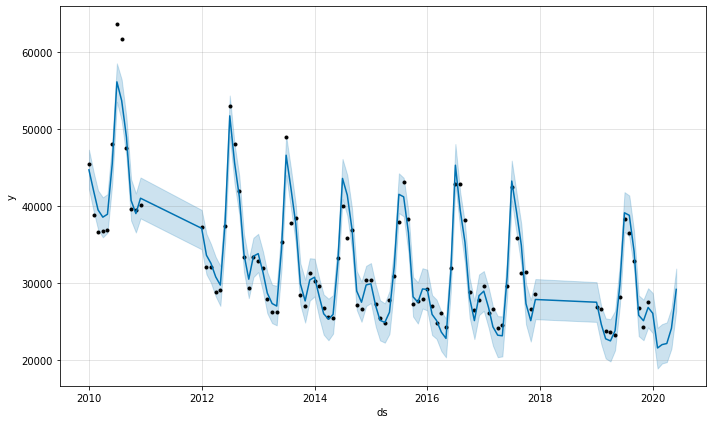

In [125]:
fig6mths = monthly_model.plot(forecast_6mths)

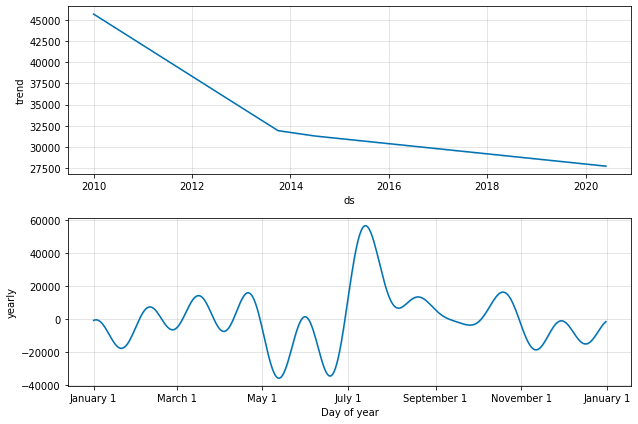

In [126]:
fig_6_mnths = monthly_model.plot_components(forecast_6mths)

In [127]:
future_9_months = monthly_model.make_future_dataframe(periods=9, freq='M')
future_9_months.tail()

,ds
100,2020-04-30
101,2020-05-31
102,2020-06-30
103,2020-07-31
104,2020-08-31


In [128]:
forecast_9mths = monthly_model.predict(future_9_months)
forecast_9mths[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
100,2020-04-30,24110.025221,21606.319571,26698.211432
101,2020-05-31,29165.842512,26412.896360,31791.664369
102,2020-06-30,37057.746288,34324.166814,39485.424963
103,2020-07-31,38605.866223,36091.844053,41227.330317
104,2020-08-31,33734.951592,31196.864503,36200.521892


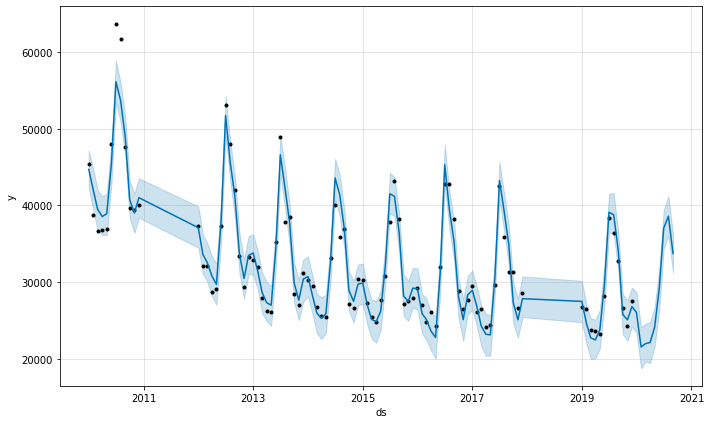

In [129]:
fig9mths = monthly_model.plot(forecast_9mths)

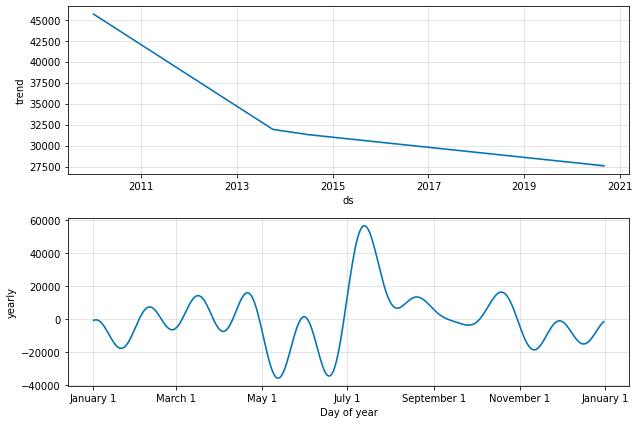

In [ ]:
fig_9_mnths = monthly_model.plot_components(forecast_9mths)

In [ ]:
forecast = monthly_model.predict(test_m)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
20,2021-09-01,32497.088679,29994.012197,35240.040109
21,2021-10-01,24905.260761,22187.158402,27549.907871
22,2021-11-01,22696.448086,20064.171602,25260.613968
23,2021-12-01,25449.766196,22608.534256,28155.500087
24,2022-01-01,25821.456534,23232.125088,28612.629671


##Metric Analysis :

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

print('\033[1m'"Mean Absolute Percentage Error :",mean_absolute_percentage_error(test_m['y'], forecast['yhat']))
print("R2 Score :",r2_score(test_m['y'], forecast['yhat']))
print("Mean Absolute Error :", mean_absolute_error(test_m['y'], forecast['yhat']))

Mean Absolute Percentage Error : 0.0735794969638918
R2 Score : 0.8051258412803955
Mean Absolute Error : 2078.8567316828303


## Daily Analysis :

In [ ]:
daily_model = Prophet()
train_d = DailyConsumption.iloc[:len(DailyConsumption)-365]
test_d = DailyConsumption.iloc[len(DailyConsumption)-365:]
daily_model.fit(train_d)
train_d.tail()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvbabt71s/h8bg4x64.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvbabt71s/da8xm0ex.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56798', 'data', 'file=/tmp/tmpvbabt71s/h8bg4x64.json', 'init=/tmp/tmpvbabt71s/da8xm0ex.json', 'output', 'file=/tmp/tmpvbabt71s/prophet_modelcnr85_42/prophet_model-20221221034223.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:42:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:42:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,y
3314,2021-01-27,28390.41827
3315,2021-01-28,28390.41827
3316,2021-01-29,28390.41827
3317,2021-01-30,28390.41827
3318,2021-01-31,28390.41827


In [ ]:
future_100_days = daily_model.make_future_dataframe(periods=100)
future_100_days.tail()

,ds
3414,2021-05-07
3415,2021-05-08
3416,2021-05-09
3417,2021-05-10
3418,2021-05-11


In [ ]:
forecast_100days = daily_model.predict(future_100_days)
forecast_100days[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3414,2021-05-07,23695.256158,20753.206140,26516.882215
3415,2021-05-08,23593.542601,20626.107169,26438.583478
3416,2021-05-09,23501.319840,20565.398855,26360.011190
3417,2021-05-10,23425.451470,20581.126782,26531.583364
3418,2021-05-11,23304.406404,20439.925165,26064.232443


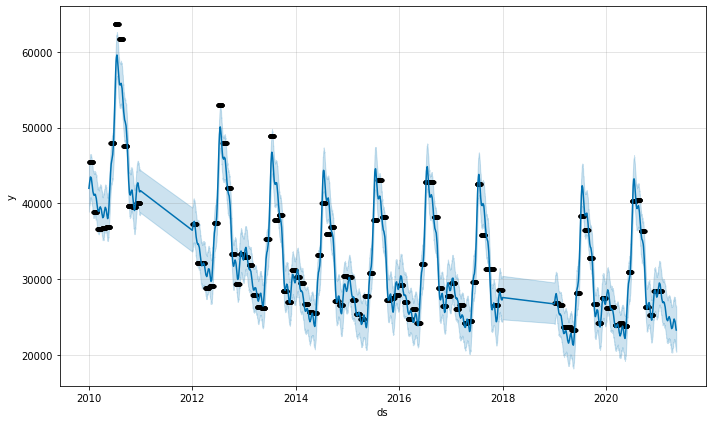

In [ ]:
fig100days = daily_model.plot(forecast_100days)

In [ ]:
future_365_days = daily_model.make_future_dataframe(periods = 365)
future_365_days.tail()

,ds
3679,2022-01-27
3680,2022-01-28
3681,2022-01-29
3682,2022-01-30
3683,2022-01-31


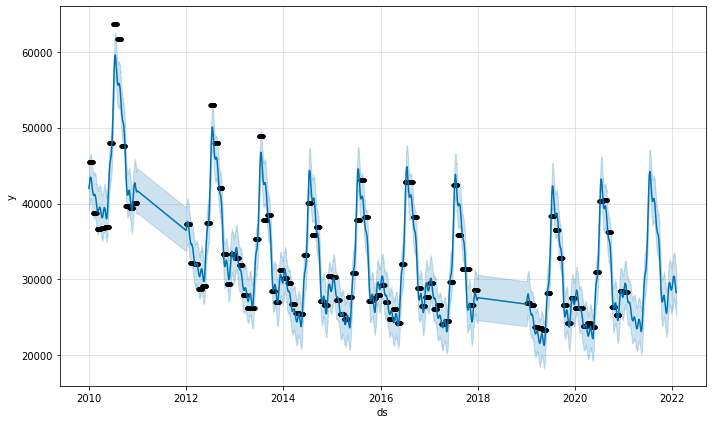

In [ ]:
forecast_365days = daily_model.predict(future_365_days)
forecast_365days[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
fig365days = daily_model.plot(forecast_365days)

In [ ]:
forecast_testd = daily_model.predict(test_d)
forecast_testd[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
360,2022-01-27,28700.420189,25550.458959,31782.810734
361,2022-01-28,28552.053136,25482.860147,31789.608692
362,2022-01-29,28448.155261,25209.062438,31536.833149
363,2022-01-30,28357.153335,25323.725440,31419.536856
364,2022-01-31,28281.970946,25094.448645,31211.164837


In [ ]:
print('\033[1m'"Mean Absolute Percentage Error :",mean_absolute_percentage_error(test_d['y'], forecast_testd['yhat']))
print("R2 Score :",r2_score(test_d['y'], forecast_testd['yhat']))
print("Mean Absolute Error :", mean_absolute_error(test_d['y'], forecast_testd['yhat']))

Mean Absolute Percentage Error : 0.0710820301244881
R2 Score : 0.6900492916110758
Mean Absolute Error : 2095.4893379389086


In [ ]:
yearly_model = Prophet()
train_y = YearlyConsumption.iloc[:len(YearlyConsumption)-3]
test_y = YearlyConsumption.iloc[len(YearlyConsumption)-3:]
yearly_model.fit(train_y)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 4.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvbabt71s/y5rqev9s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvbabt71s/mcx27hnd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6728', 'data', 'file=/tmp/tmpvbabt71s/y5rqev9s.json', 'init=/tmp/tmpvbabt71s/mcx27hnd.json', 'output', 'file=/tmp/tmpvbabt71s/prophet_modelasjxrpkr/prophet_model-20221221034237.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
03:42:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:42:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmd

In [ ]:
future_years = yearly_model.make_future_dataframe(periods=3, freq='y')
future_years.tail()

,ds
5,2016-01-01
6,2017-01-01
7,2017-12-31
8,2018-12-31
9,2019-12-31


In [ ]:
forecast_next_year = yearly_model.predict(future_years)
forecast_next_year[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
5,2016-01-01,29530.011078,26759.639370,32297.010903
6,2017-01-01,27397.258684,24577.684011,30141.736854
7,2017-12-31,25625.485038,22864.898650,28477.559131
8,2018-12-31,23643.774357,20944.519847,26578.242416
9,2019-12-31,21642.462268,18932.528757,24530.899226


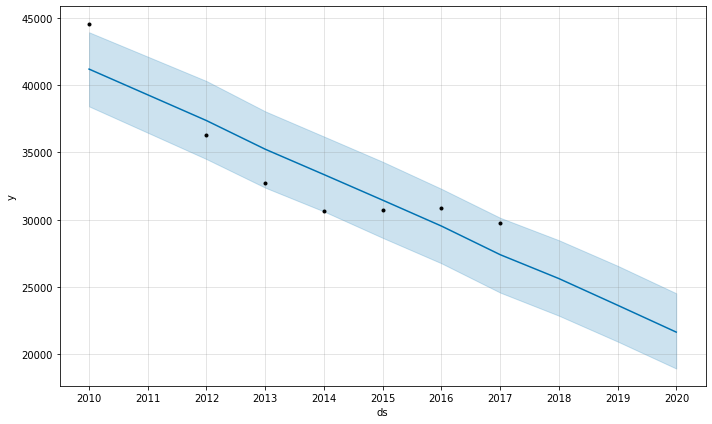

In [ ]:
fig1yr = yearly_model.plot(forecast_next_year)

In [ ]:
plot_plotly(yearly_model,forecast_next_year)

In [ ]:
forecast_year = yearly_model.predict(test_y)
forecast_year[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
0,2019-01-01,23610.366466,20759.650225,26472.779658
1,2020-01-01,21687.548983,18829.117983,24303.756554
2,2021-01-01,19554.796588,16795.576330,22411.344670


In [ ]:
print('\033[1m'"Mean Absolute Percentage Error :",mean_absolute_percentage_error(test_y['y'], forecast_year['yhat']))
print("R2 Score :",r2_score(test_y['y'], forecast_year['yhat']))
print("Mean Absolute Error :", mean_absolute_error(test_y['y'], forecast_year['yhat']))

Mean Absolute Percentage Error : 0.24535232820416905
R2 Score : -191.44364620921365
Mean Absolute Error : 7042.206054289924


# Tuning the model with Cross validation :

In [141]:
from pandas.core.arrays import period
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
import itertools
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(MonthlyConsumption)  # Fit model with given params
    df_cv = cross_validation(m, horizon = '365 days', period='365 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgybeuz16/vb2wy0ba.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgybeuz16/h3jknq02.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99591', 'data', 'file=/tmp/tmpgybeuz16/vb2wy0ba.json', 'init=/tmp/tmpgybeuz16/h3jknq02.json', 'output', 'file=/tmp/tmpgybeuz16/prophet_modelql8pemso/prophet_model-20221222005106.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:51:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:51:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
00:51:06 - cmdstanpy - ERROR - Chain [1] 

    changepoint_prior_scale  seasonality_prior_scale         rmse
0                     0.001                     0.01  5118.881822
1                     0.001                     0.10  4697.376305
2                     0.001                     1.00  4863.875923
3                     0.001                    10.00  4788.376157
4                     0.010                     0.01  5005.228363
5                     0.010                     0.10  4401.823024
6                     0.010                     1.00  4798.074098
7                     0.010                    10.00  4587.981451
8                     0.100                     0.01  3621.249268
9                     0.100                     0.10  3748.845004
10                    0.100                     1.00  4121.492321
11                    0.100                    10.00  3275.322358
12                    0.500                     0.01  3256.732649
13                    0.500                     0.10  7419.779557
14        

In [ ]:
best_params = all_params[np.argmin(rmses)]
print(best_params)

{'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 10.0}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgybeuz16/iqq7hpfw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgybeuz16/9acs06xj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47747', 'data', 'file=/tmp/tmpgybeuz16/iqq7hpfw.json', 'init=/tmp/tmpgybeuz16/9acs06xj.json', 'output', 'file=/tmp/tmpgybeuz16/prophet_modelexnws7t1/prophet_model-20221221232323.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:23:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:23:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


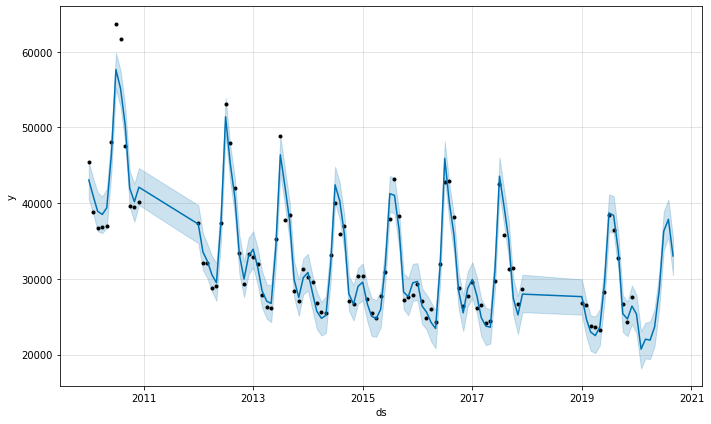

In [136]:
m = Prophet(changepoint_prior_scale=0.5, seasonality_prior_scale= 10.0)
forecast = m.fit(train_m).predict(future_9_months)
fig = m.plot(forecast)

In [142]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,57 days,8.626531e+06,2937.095653,2738.309060,0.101059,0.108685,0.105252,0.166667
1,58 days,5.401241e+06,2324.057036,2015.665344,0.077462,0.076488,0.080177,0.444444
2,59 days,3.792445e+06,1947.419999,1614.182328,0.063220,0.060218,0.065578,0.666667
3,88 days,3.490461e+06,1868.277555,1514.589870,0.060125,0.059538,0.062783,0.777778
4,89 days,4.453423e+06,2110.313379,1753.558675,0.070301,0.070384,0.073827,0.666667


# Based on Boroughs:

In [ ]:
df = pd.read_csv('/content/Electric_Consumption_And_Cost__2010_-_Feb_2022_.csv')
df['Revenue Month'] = pd.to_datetime(df['Revenue Month'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407031 entries, 0 to 407030
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Borough            407031 non-null  object        
 1   Revenue Month      407031 non-null  datetime64[ns]
 2   Consumption (KWH)  407031 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 9.3+ MB


In [ ]:
df = df.groupby(['Borough','Revenue Month'])[['Consumption (KWH)']].mean().reset_index()

In [ ]:
df

,Borough,Revenue Month,Consumption (KWH)
0,BRONX,2010-01-01,50028.041121
1,BRONX,2010-02-01,43427.414365
2,BRONX,2010-03-01,39666.351786
3,BRONX,2010-04-01,39226.902309
4,BRONX,2010-05-01,40515.679144
...,...,...,...
784,STATEN ISLAND,2021-09-01,131800.000000
785,STATEN ISLAND,2021-10-01,99293.120000
786,STATEN ISLAND,2021-11-01,94487.840000
787,STATEN ISLAND,2021-12-01,96181.120000


## Reading all CSVs

In [87]:
df_Bronx = pd.read_csv('/content/Bronx.csv')
df_Brooklyn = pd.read_csv('/content/Brooklyn.csv')
df_FHA = pd.read_csv('/content/FHA.csv')
df_MANHATTAN = pd.read_csv('/content/MANHATTAN.csv')
df_NDF = pd.read_csv('/content/NDF.csv')
df_Queens = pd.read_csv('/content/QUEENS.csv')
df_SI = pd.read_csv('/content/SI.csv')

In [89]:
df_SI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Revenue Month      121 non-null    object 
 1   Consumption (KWH)  121 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.0+ KB


## Make changes to fit it to the model :

In [92]:
df_Bronx['Revenue Month'] = pd.to_datetime(df_Bronx['Revenue Month'])
df_Brooklyn['Revenue Month'] = pd.to_datetime(df_Brooklyn['Revenue Month'])
df_FHA['Revenue Month'] = pd.to_datetime(df_FHA['Revenue Month'])
df_MANHATTAN['Revenue Month'] = pd.to_datetime(df_MANHATTAN['Revenue Month'])
df_NDF['Revenue Month'] = pd.to_datetime(df_NDF['Revenue Month'])
df_Queens['Revenue Month'] = pd.to_datetime(df_Queens['Revenue Month'])
df_SI['Revenue Month'] = pd.to_datetime(df_SI['Revenue Month'])

df_Bronx.rename(columns={'Revenue Month':'ds','Consumption (KWH)':'y'},inplace=True)
df_Brooklyn.rename(columns={'Revenue Month':'ds','Consumption (KWH)':'y'},inplace=True)
df_FHA.rename(columns={'Revenue Month':'ds','Consumption (KWH)':'y'},inplace=True)
df_MANHATTAN.rename(columns={'Revenue Month':'ds','Consumption (KWH)':'y'},inplace=True)
df_NDF.rename(columns={'Revenue Month':'ds','Consumption (KWH)':'y'},inplace=True)
df_Queens.rename(columns={'Revenue Month':'ds','Consumption (KWH)':'y'},inplace=True)
df_SI.rename(columns={'Revenue Month':'ds','Consumption (KWH)':'y'},inplace=True)

In [93]:
df_SI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      121 non-null    datetime64[ns]
 1   y       121 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.0 KB


# BRONX:

In [102]:
model_loc_wise = Prophet()
train = df_Bronx.iloc[:len(MonthlyConsumption)-25]
test = df_Bronx.iloc[len(MonthlyConsumption)-25:]
model_loc_wise.fit(train)
future = model_loc_wise.make_future_dataframe(periods=9, freq='M')
future.tail()
forecast = model_loc_wise.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgybeuz16/e5qzj70_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgybeuz16/dicxarbe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71662', 'data', 'file=/tmp/tmpgybeuz16/e5qzj70_.json', 'init=/tmp/tmpgybeuz16/dicxarbe.json', 'output', 'file=/tmp/tmpgybeuz16/prophet_model2f_1ji5r/prophet_model-20221221184438.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:44:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
100,2020-04-30,29240.141558,26267.151669,32253.670752
101,2020-05-31,35558.562169,32752.108194,38472.579948
102,2020-06-30,46325.219972,43304.180360,49271.068880
103,2020-07-31,46596.250936,43714.886414,49573.709598
104,2020-08-31,40311.623410,37186.293871,43224.382319


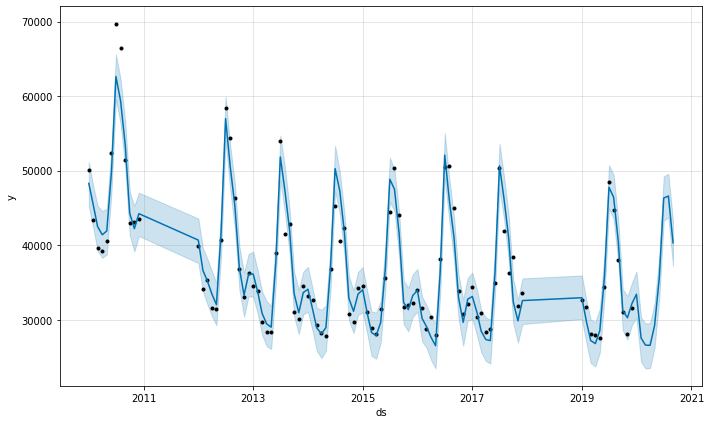

In [103]:
fig1 = model_loc_wise.plot(forecast)

# BROOKLYN:

In [105]:
model_loc_wise = Prophet()
train = df_Brooklyn.iloc[:len(MonthlyConsumption)-25]
test = df_Brooklyn.iloc[len(MonthlyConsumption)-25:]
model_loc_wise.fit(train)
future = model_loc_wise.make_future_dataframe(periods=9, freq='M')
future.tail()
forecast = model_loc_wise.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgybeuz16/nvdipufz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgybeuz16/sf67vo_w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42285', 'data', 'file=/tmp/tmpgybeuz16/nvdipufz.json', 'init=/tmp/tmpgybeuz16/sf67vo_w.json', 'output', 'file=/tmp/tmpgybeuz16/prophet_modelh8qg38eb/prophet_model-20221221184526.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:45:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:45:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
100,2020-04-30,18804.252089,16334.218175,21277.330564
101,2020-05-31,22578.386353,20270.660931,25094.135507
102,2020-06-30,27658.511937,25351.178277,30160.164165
103,2020-07-31,29827.037670,27333.426866,32153.142619
104,2020-08-31,26027.344621,23653.633681,28371.356807


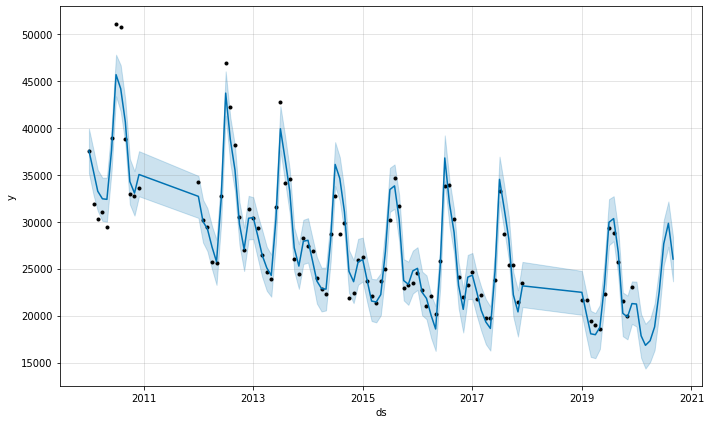

In [106]:
fig1 = model_loc_wise.plot(forecast)

# FHA :

In [107]:
model_loc_wise = Prophet()
train = df_FHA.iloc[:len(MonthlyConsumption)-25]
test = df_FHA.iloc[len(MonthlyConsumption)-25:]
model_loc_wise.fit(train)
future = model_loc_wise.make_future_dataframe(periods=9, freq='M')
future.tail()
forecast = model_loc_wise.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgybeuz16/1bb9sfm0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgybeuz16/3liakwqb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14059', 'data', 'file=/tmp/tmpgybeuz16/1bb9sfm0.json', 'init=/tmp/tmpgybeuz16/3liakwqb.json', 'output', 'file=/tmp/tmpgybeuz16/prophet_model5wiluv2k/prophet_model-20221221184609.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:46:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:46:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
100,2021-06-30,172.746421,126.066969,218.125417
101,2021-07-31,170.599218,126.653614,216.148491
102,2021-08-31,133.141933,87.994369,177.059205
103,2021-09-30,151.153893,104.376362,199.881475
104,2021-10-31,169.241026,126.042487,218.938708


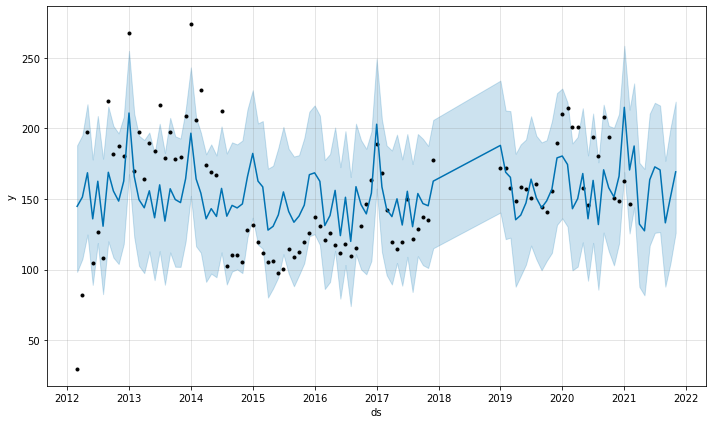

In [108]:
fig1 = model_loc_wise.plot(forecast)

# MANHATTAN

In [109]:
model_loc_wise = Prophet()
train = df_MANHATTAN.iloc[:len(MonthlyConsumption)-25]
test = df_MANHATTAN.iloc[len(MonthlyConsumption)-25:]
model_loc_wise.fit(train)
future = model_loc_wise.make_future_dataframe(periods=9, freq='M')
future.tail()
forecast = model_loc_wise.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgybeuz16/yu8gliko.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgybeuz16/xo_i1zox.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53812', 'data', 'file=/tmp/tmpgybeuz16/yu8gliko.json', 'init=/tmp/tmpgybeuz16/xo_i1zox.json', 'output', 'file=/tmp/tmpgybeuz16/prophet_model9kwb9rvv/prophet_model-20221221184801.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:48:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:48:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
100,2020-04-30,29217.821700,26199.204781,32347.073845
101,2020-05-31,36033.679947,33141.500940,39337.107037
102,2020-06-30,45348.646551,42127.768314,48402.602271
103,2020-07-31,47688.407052,44554.205722,50815.124184
104,2020-08-31,40651.075025,37657.940391,43959.123118


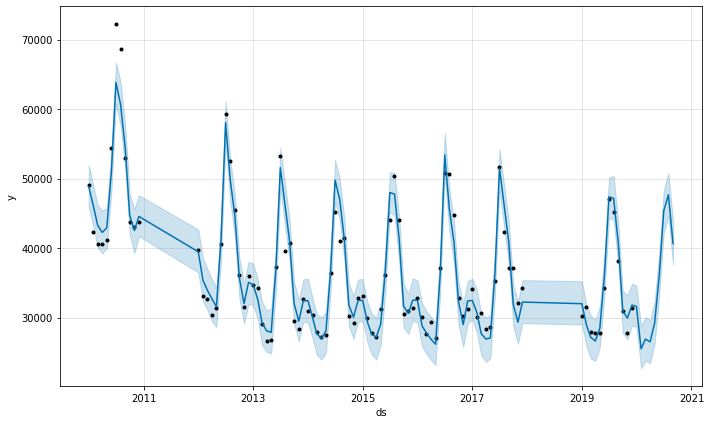

In [110]:
fig1 = model_loc_wise.plot(forecast)

# NDF:

In [111]:
model_loc_wise = Prophet()
train = df_NDF.iloc[:len(MonthlyConsumption)-25]
test = df_NDF.iloc[len(MonthlyConsumption)-25:]
model_loc_wise.fit(train)
future = model_loc_wise.make_future_dataframe(periods=9, freq='M')
future.tail()
forecast = model_loc_wise.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgybeuz16/hpaf6itb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgybeuz16/0t3gx6gu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78348', 'data', 'file=/tmp/tmpgybeuz16/hpaf6itb.json', 'init=/tmp/tmpgybeuz16/0t3gx6gu.json', 'output', 'file=/tmp/tmpgybeuz16/prophet_modeli5dk_ylx/prophet_model-20221221184802.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:48:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:48:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
81,2022-05-31,73862.249511,68824.919987,78883.672101
82,2022-06-30,77638.841170,72539.717993,82399.517704
83,2022-07-31,70153.563267,64826.937721,74977.017690
84,2022-08-31,73825.563694,68776.927413,79116.597579
85,2022-09-30,62014.676775,56990.859216,67011.461771


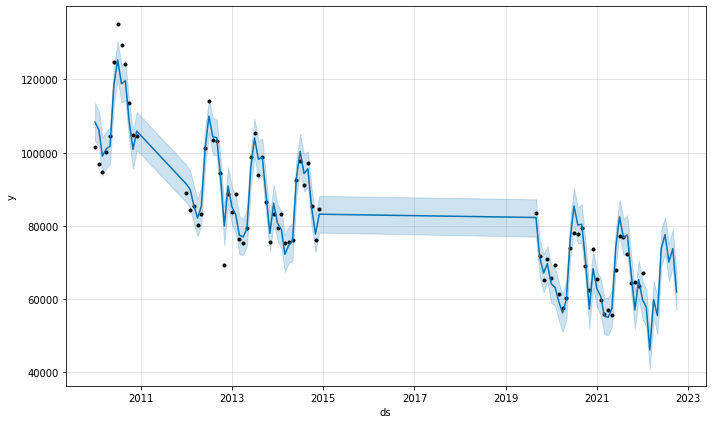

In [112]:
fig1 = model_loc_wise.plot(forecast)

# QUEENS:

In [113]:
model_loc_wise = Prophet()
train = df_Queens.iloc[:len(MonthlyConsumption)-25]
test = df_Queens.iloc[len(MonthlyConsumption)-25:]
model_loc_wise.fit(train)
future = model_loc_wise.make_future_dataframe(periods=9, freq='M')
future.tail()
forecast = model_loc_wise.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgybeuz16/pltguhqk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgybeuz16/3q31q2pp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88426', 'data', 'file=/tmp/tmpgybeuz16/pltguhqk.json', 'init=/tmp/tmpgybeuz16/3q31q2pp.json', 'output', 'file=/tmp/tmpgybeuz16/prophet_model6a_f74aq/prophet_model-20221221184804.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:48:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:48:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
100,2020-04-30,16862.258617,13853.968070,19759.803960
101,2020-05-31,19446.564954,16568.174541,22524.345004
102,2020-06-30,27041.956188,24128.579624,30111.033670
103,2020-07-31,28097.505957,25105.315428,31222.267491
104,2020-08-31,25389.039982,22362.114075,28382.303248


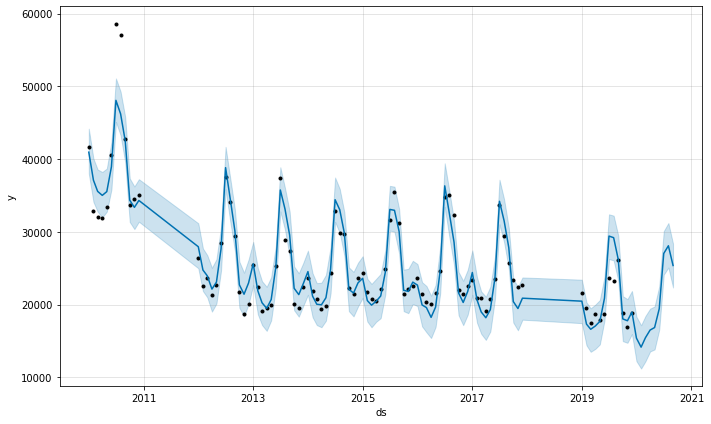

In [114]:
fig1 = model_loc_wise.plot(forecast)

# STATEN ISLAND

In [115]:
model_loc_wise = Prophet()
train = df_SI.iloc[:len(MonthlyConsumption)-25]
test = df_SI.iloc[len(MonthlyConsumption)-25:]
model_loc_wise.fit(train)
future = model_loc_wise.make_future_dataframe(periods=9, freq='M')
future.tail()
forecast = model_loc_wise.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgybeuz16/eiak0by0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgybeuz16/pmeqnb8g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78612', 'data', 'file=/tmp/tmpgybeuz16/eiak0by0.json', 'init=/tmp/tmpgybeuz16/pmeqnb8g.json', 'output', 'file=/tmp/tmpgybeuz16/prophet_modelbfifngy1/prophet_model-20221221184806.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:48:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:48:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
100,2020-04-30,92361.538634,84248.882614,100192.446198
101,2020-05-31,112790.280932,105164.465007,120787.596856
102,2020-06-30,139866.670999,132000.814251,147785.481518
103,2020-07-31,136126.724159,128478.516331,143738.402108
104,2020-08-31,128290.212017,120428.549717,135675.812743


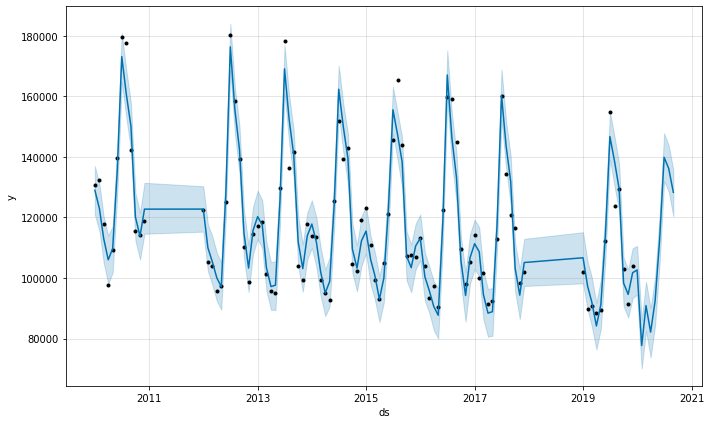

In [116]:
fig1 = model_loc_wise.plot(forecast)

# So based on the analysis the **STATEN ISLAND** has the highest consumption. 